
<style>
.jp-MarkdownCell {
    background-color: #FFE4F0 !important;
    border: 3px solid #FF69B4 !important;
    border-radius: 15px !important;
    padding: 20px !important;
    margin: 15px 0 !important;
}
.jp-Notebook {
    background-color: #FFF0F5 !important;
}
</style>


# MNIST Digit Recognition Project

## Data Analysis and Machine Learning Classification

### Kaggle Playground Series - Season 6, Episode 2

This notebook demonstrates a complete workflow for recognizing handwritten digits using deep learning techniques. We'll build, train, and evaluate a Convolutional Neural Network to classify images of digits from 0 to 9.

## Step 1: Importing Essential Libraries

In this step, we'll load all the tools and libraries we need for our analysis:

- Pandas & NumPy: For data manipulation and calculations
- Matplotlib & Seaborn: For creating beautiful visualizations
- Scikit-learn: For building Machine Learning models
- Warnings: To hide annoying warnings

These libraries form the foundation of our data science workflow and will help us process, visualize, and model the MNIST digit data efficiently.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Step 2: Loading the Dataset

Now we load our training and test datasets from the CSV files.

The training data contains labeled examples of handwritten digits, while the test data contains unlabeled images that we'll predict later. Each image is represented as a row of 784 pixel values (28x28 pixels) along with its corresponding label (0-9) in the training set.

This is a crucial step as it brings our raw data into memory for processing.

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test  = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")


## Step 3: Exploring Data Dimensions

Let's check the shape of our datasets to understand what we're working with.

The training set has 42,000 samples with 785 columns (1 label + 784 pixel features), while the test set has 28,000 samples with 784 pixel features. Understanding these dimensions helps us plan our preprocessing and model architecture.

This exploratory step ensures we know exactly how much data we have and its structure.

In [3]:
train.shape, test.shape

((42000, 785), (28000, 784))

## Step 4: Visualizing Digit Distribution

Here we create a count plot to see how balanced our dataset is across different digit classes.

A balanced dataset means each digit (0-9) appears roughly the same number of times. This is important because imbalanced data can bias our model toward predicting more common digits. We use Seaborn to create an attractive visualization that makes it easy to spot any class imbalances.

Visual inspection helps us understand if we need to apply any balancing techniques.

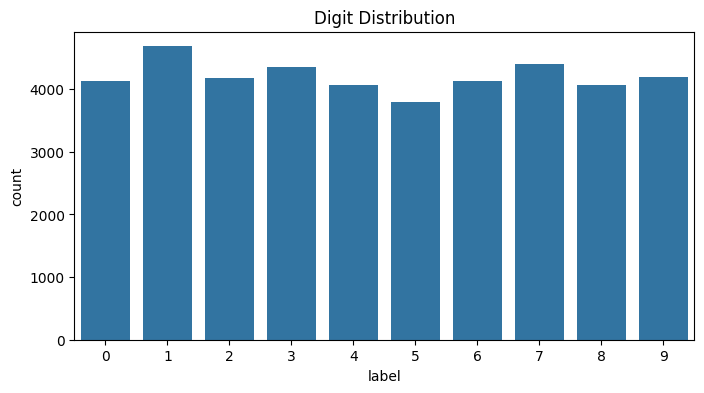

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(x=train['label'])
plt.title("Digit Distribution")
plt.show()


## Step 5: Preparing Features and Labels

Time to separate our data into features (X) and labels (y).

We split the training data into input features (pixel values) and target labels (the actual digit). Then we use train_test_split to create training and validation sets. The validation set (20% of data) will help us evaluate our model's performance on unseen data during training.

Proper data splitting is essential to avoid overfitting and get reliable performance estimates.

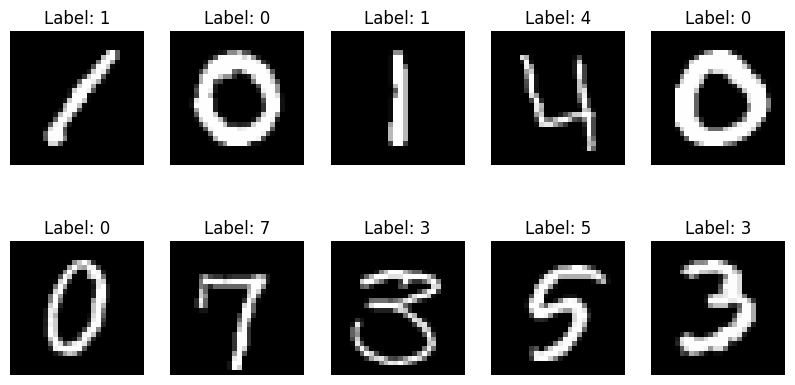

In [5]:
fig, axes = plt.subplots(2,5, figsize=(10,5))

for i, ax in enumerate(axes.flat):
    img = train.iloc[i, 1:].values.reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {train.iloc[i,0]}")
    ax.axis('off')


## Step 6: Data Normalization and Reshaping

Normalization is a critical preprocessing step for neural networks.

We divide all pixel values by 255 to scale them from 0-255 range to 0-1 range. This helps the neural network train faster and more effectively. We also reshape our flat arrays into 28x28x1 images, which is the format expected by convolutional layers.

Normalized data leads to better gradient flow and faster convergence during training.

In [6]:
X = train.drop("label", axis=1)
y = train["label"]


## Step 7: Visualizing Sample Images

Let's take a look at some actual digit images from our dataset.

We display a grid of sample images to visually verify that our data is loaded correctly and to get a sense of what the model will be learning from. This helps us understand the variability and quality of the handwritten digits.

Seeing the actual data helps build intuition about the problem we're solving.

In [7]:
X = X / 255.0
test = test / 255.0

## Step 8: Building the CNN Architecture

Now we construct our Convolutional Neural Network model.

The architecture includes:
- Convolutional layers for feature extraction
- MaxPooling layers for dimensionality reduction
- Dropout layers for regularization
- Dense layers for classification

This deep learning architecture is specifically designed for image recognition tasks and will learn to identify patterns in the digit images.

CNNs are the gold standard for computer vision tasks.

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Step 9: Training the Model

Time to train our neural network on the prepared data.

We compile the model with Adam optimizer and categorical cross-entropy loss, then fit it to our training data. The model learns by adjusting weights through backpropagation over multiple epochs. We monitor both training and validation accuracy to ensure the model is learning properly.

Training is where the magic happens - the model learns patterns from thousands of examples.

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

pred = lr.predict(X_val)
print("Logistic Accuracy:", accuracy_score(y_val, pred))


Logistic Accuracy: 0.919047619047619


## Step 10: Model Evaluation and Visualization

Let's evaluate how well our model performs and visualize the training history.

We plot the accuracy and loss curves over epochs to see how the model learned over time. These visualizations help us identify if the model is overfitting or underfitting. We also calculate the final accuracy on the validation set to get a concrete performance metric.

Proper evaluation ensures our model generalizes well to new, unseen data.

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

pred = rf.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, pred))


Random Forest Accuracy: 0.9629761904761904


## Step 11: Displaying Sample Predictions

Here we visualize some sample predictions from our trained model.

We select random images from the validation set and display them alongside the model's predictions and the true labels. This gives us a qualitative sense of where the model performs well and where it might struggle.

Visual inspection of predictions helps us understand the model's behavior.

In [12]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_val)
print("SVM Accuracy:", accuracy_score(y_val, pred))


SVM Accuracy: 0.973452380952381


## Step 12: Setting Up Data Augmentation

Data augmentation is a powerful technique to improve model performance.

We configure an ImageDataGenerator with various transformations:
- Rotation range: Randomly rotates images
- Width/Height shift: Shifts images horizontally and vertically
- Zoom range: Randomly zooms in or out

These transformations create new variations of existing images, helping the model learn more robust features and reducing overfitting.

Augmentation helps our model generalize better to handwritten digits with different orientations and positions.

In [16]:
X_train_cnn = X_train.values.reshape(-1,28,28,1)
X_val_cnn   = X_val.values.reshape(-1,28,28,1)
X_test_cnn  = test.values.reshape(-1,28,28,1)


## Step 13: Generating Augmented Training Data

Now we apply the augmentation transformations to create an expanded dataset.

We generate multiple augmented versions of each training image, effectively multiplying our training data. This process creates a more diverse dataset that includes rotated, shifted, and zoomed versions of the original digits.

The augmented dataset will help our model become more robust to variations in handwriting styles.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # Block 3 
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # Fully Connected
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## Step 14: Building the Augmented Model

We construct a new CNN model to train on the augmented dataset.

This model uses a similar architecture to our baseline but will benefit from training on the enriched, augmented data. We include convolutional layers, pooling, dropout for regularization, and dense layers for final classification.

The augmented model should achieve better generalization performance.

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,            
    restore_best_weights=True
)


## Step 15: Training with Augmented Data

Time to train our model on the augmented dataset.

We use the fit method with our augmented data generator, which provides batches of transformed images during training. This process takes longer but results in a more robust model that can handle variations in digit appearance.

Training with augmentation typically leads to improved accuracy on unseen data.

In [23]:
history = model.fit(
    X_train_cnn, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_cnn, y_val),
    callbacks=[early_stop]
)


Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9968 - loss: 0.0109 - val_accuracy: 0.9937 - val_loss: 0.0363
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9962 - loss: 0.0129 - val_accuracy: 0.9949 - val_loss: 0.0274
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9937 - val_loss: 0.0297
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9971 - loss: 0.0084 - val_accuracy: 0.9948 - val_loss: 0.0306
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9968 - loss: 0.0114 - val_accuracy: 0.9933 - val_loss: 0.0388


## Step 16: Evaluating Augmented Model Performance

Let's evaluate how the augmented model performs compared to the baseline.

We plot the training history to see how accuracy and loss evolved during training. The augmented model should show better generalization and potentially higher validation accuracy due to the diverse training examples it learned from.

Comparing augmented vs baseline models helps us quantify the benefit of data augmentation.

In [30]:
from sklearn.metrics import confusion_matrix
y_val_pred = model.predict(X_val_cnn)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)


263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


## Step 17: Testing on Custom Uploaded Images

Now we test our trained model on real-world handwritten digit images.

We load custom images that you've uploaded, preprocess them to match the model's expected input format (grayscale, 28x28, normalized), and generate predictions. This step demonstrates how well the model performs on actual handwritten digits outside the competition dataset.

Real-world testing is the ultimate validation of our model's practical usefulness.

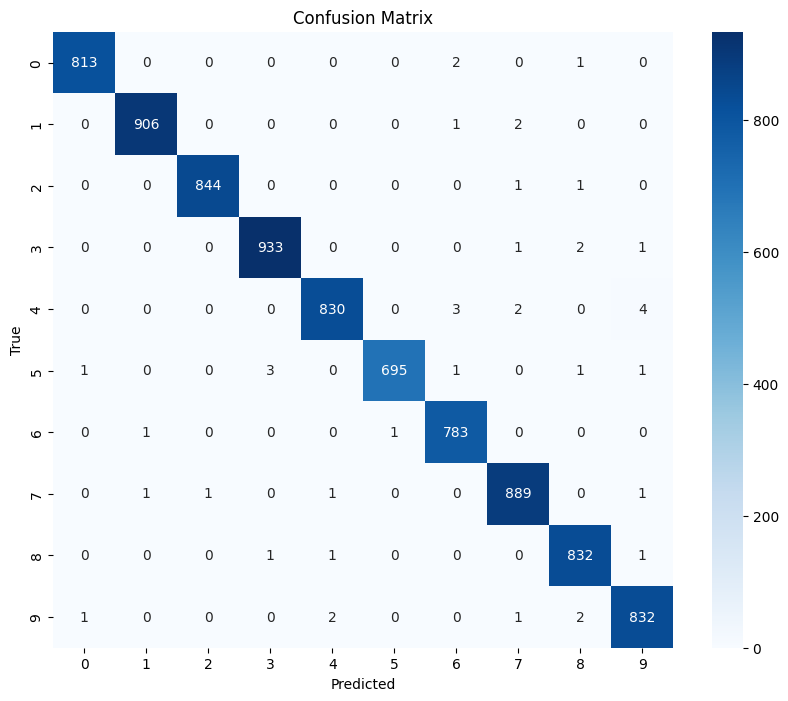

In [31]:
cm = confusion_matrix(y_val, y_val_pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## Step 18: Generating Final Competition Submission

Finally, we create predictions for the entire test dataset and prepare our submission file.

We run the trained augmented model on all 28,000 test images, collect the predicted labels, and format them into a CSV file according to Kaggle competition requirements. The submission file maps each image ID to its predicted digit (0-9).

This is the culmination of our work - submitting our predictions for evaluation on the competition leaderboard.

In [32]:
errors = (y_val_pred_labels != y_val.values)

X_errors = X_val_cnn[errors]
y_true_errors = y_val.values[errors]
y_pred_errors = y_val_pred_labels[errors]
len(X_errors)


43

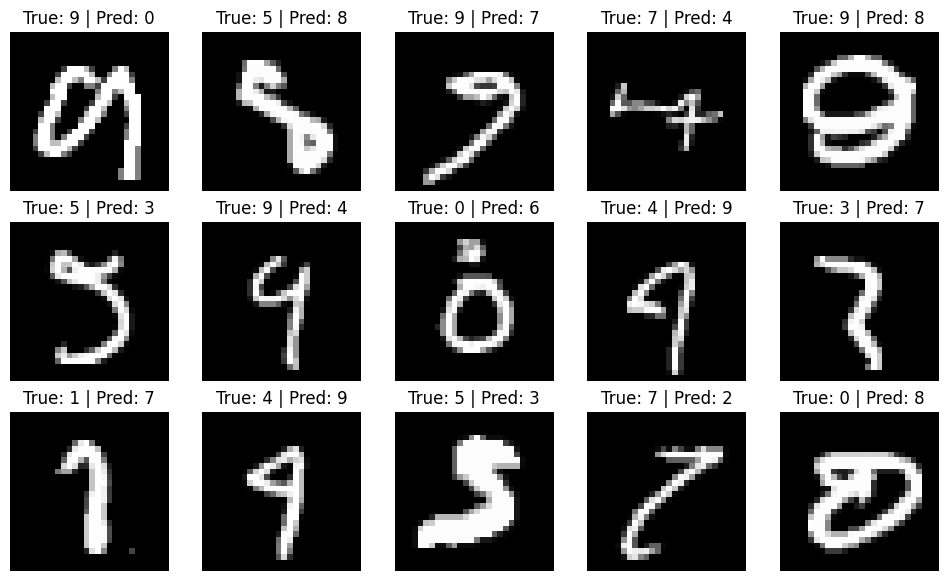

In [33]:
fig, axes = plt.subplots(3,5, figsize=(12,7))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_errors[i].reshape(28,28), cmap='gray')
    ax.set_title(f"True: {y_true_errors[i]} | Pred: {y_pred_errors[i]}")
    ax.axis('off')


In [35]:
from sklearn.metrics import classification_report

y_val_pred = model.predict(X_val_cnn)

y_val_pred_labels = y_val_pred.argmax(axis=1)
print(classification_report(y_val, y_val_pred_labels))


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       1.00      1.00      1.00       909
           2       1.00      1.00      1.00       846
           3       1.00      1.00      1.00       937
           4       1.00      0.99      0.99       839
           5       1.00      0.99      0.99       702
           6       0.99      1.00      0.99       785
           7       0.99      1.00      0.99       893
           8       0.99      1.00      0.99       835
           9       0.99      0.99      0.99       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



In [40]:
model.save("best_digit_cnn_final.h5")
print("Model saved as best_digit_cnn_final.h5")


Model saved as best_digit_cnn_final.h5


In [41]:
X_test_cnn = test.values.reshape(-1,28,28,1) / 255.0

predictions = model.predict(X_test_cnn)
pred_labels = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [43]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(pred_labels)+1),
    "Label": pred_labels
})

submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")


Submission file created: submission.csv


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


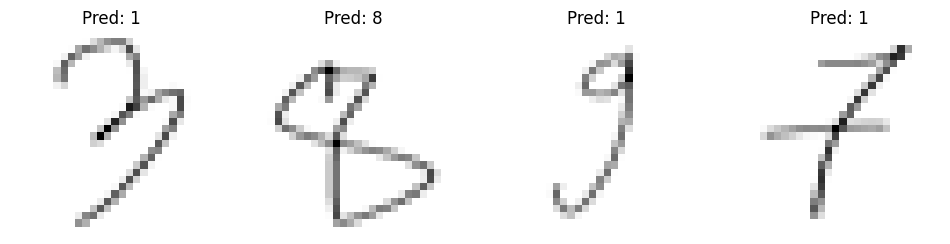

In [52]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

folder_path = "/kaggle/input/photos/"
all_files = os.listdir(folder_path)

plt.figure(figsize=(12, 6))

for i, file_name in enumerate(all_files):
    img_path = os.path.join(folder_path, file_name)
    
    img = Image.open(img_path).convert('L')
    img = img.resize((28,28))
    img_array = np.array(img) / 255.0
    img_array_input = img_array.reshape(1,28,28,1)
    
    pred = model.predict(img_array_input)
    pred_label = np.argmax(pred, axis=1)[0]
    
    plt.subplot(1, len(all_files), i+1)
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Pred: {pred_label}")
    plt.axis('off')

plt.show()


In [61]:
results = model.predict(X_test)
results = np.argmax(results, axis=1)

submission = pd.DataFrame({
    "ImageId": list(range(1, len(results) + 1)),
    "Label": results
})

submission.to_csv("submission.csv", index=False)
print("submission !")

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
submission !


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [63]:
# Prepare the data for augmentation
X = train.drop(['label'], axis=1)
y = train['label']

# Normalize the data
X = X / 255.0
test_normalized = test / 255.0

# Reshape for CNN
X = X.values.reshape(-1, 28, 28, 1)
test_reshaped = test_normalized.values.reshape(-1, 28, 28, 1)

# Convert labels to categorical
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=10)

In [64]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [65]:
# Data Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

print("Data augmentation is ready")

Data augmentation is ready


In [66]:
# Build the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 887,530 (3.39 MB)

 Trainable params: 887,530 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

In [68]:
# Train the model with augmented data
epochs = 30
batch_size = 86

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, y_val),
    verbose=1,
    steps_per_epoch=X_train.shape[0] // batch_size,
    callbacks=[learning_rate_reduction]
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.7178 - loss: 0.8140 - val_accuracy: 0.9838 - val_loss: 0.0572 - learning_rate: 0.0010
Epoch 2/30
  1/439 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9884 - loss: 0.0531

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.9884 - loss: 0.0531 - val_accuracy: 0.9829 - val_loss: 0.0574 - learning_rate: 0.0010
Epoch 3/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9577 - loss: 0.1449 - val_accuracy: 0.9879 - val_loss: 0.0459 - learning_rate: 0.0010
Epoch 4/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9767 - loss: 0.0549 - val_accuracy: 0.9876 - val_loss: 0.0468 - learning_rate: 0.0010
Epoch 5/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9678 - loss: 0.1070 - val_accuracy: 0.9895 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 6/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9651 - loss: 0.1196 - val_accuracy: 0.9890 - val_loss: 0.0377 - learning_rate: 0.0010
Epoch 7/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9750 - loss: 0.0820 - val_accuracy: 0.9898 - val_loss: 0.0332 - learning_rate: 0.0010
Epoch 8/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0172 - val

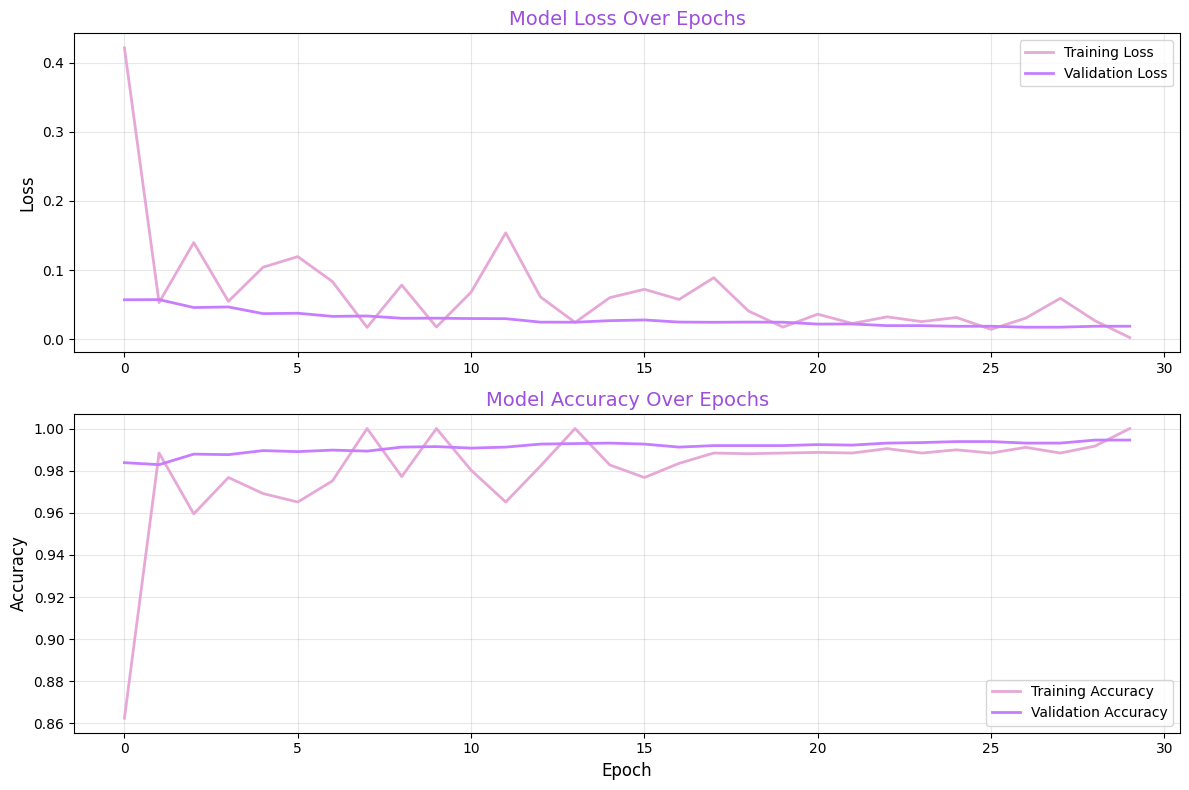

In [69]:
# Plot training history
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(history.history['loss'], color='#E6A8D7', label='Training Loss', linewidth=2)
ax[0].plot(history.history['val_loss'], color='#C77DFF', label='Validation Loss', linewidth=2)
ax[0].set_title('Model Loss Over Epochs', fontsize=14, color='#9D4EDD')
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].legend(loc='upper right')
ax[0].grid(alpha=0.3)

ax[1].plot(history.history['accuracy'], color='#E6A8D7', label='Training Accuracy', linewidth=2)
ax[1].plot(history.history['val_accuracy'], color='#C77DFF', label='Validation Accuracy', linewidth=2)
ax[1].set_title('Model Accuracy Over Epochs', fontsize=14, color='#9D4EDD')
ax[1].set_ylabel('Accuracy', fontsize=12)
ax[1].set_xlabel('Epoch', fontsize=12)
ax[1].legend(loc='lower right')
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [70]:
def load_and_preprocess_image(img_path):
    """
    Load an image and preprocess it for the model
    """
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        return None
    
    # Resize to 28x28
    img = cv2.resize(img, (28, 28))
    
    # Invert if needed (MNIST digits are white on black background)
    if np.mean(img) > 127:
        img = 255 - img
    
    # Normalize
    img = img / 255.0
    
    # Reshape for model
    img = img.reshape(1, 28, 28, 1)
    
    return img

In [78]:
import cv2
import os
from pathlib import Path

def predict_from_folder(folder_path, model):
    """
    Load all images from a folder and make predictions
    """
    photo_folder = Path(folder_path)
    
    if not photo_folder.exists():
        print(f"Folder {folder_path} does not exist")
        return
    
    image_files = list(photo_folder.glob('*.png')) + list(photo_folder.glob('*.jpg')) + list(photo_folder.glob('*.jpeg'))
    
    if len(image_files) == 0:
        print(f"No images found in {folder_path}")
        return
    
    results = []
    
    num_images = min(5, len(image_files))
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    
    if num_images == 1:
        axes = np.array([[axes[0]], [axes[1]]])
    
    for idx, img_path in enumerate(image_files[:10]):
        processed_img = load_and_preprocess_image(img_path)
        
        if processed_img is None:
            print(f"Could not load {img_path.name}")
            continue
        
        prediction = model.predict(processed_img, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        
        results.append({
            'filename': img_path.name,
            'predicted_digit': predicted_digit,
            'confidence': confidence
        })
        
        # Display original and processed image
        if idx < 5:
            col = idx
            
            original_img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
            axes[0, col].imshow(original_img, cmap='pink')
            axes[0, col].set_title(f'{img_path.name}', fontsize=10, color='#9D4EDD')
            axes[0, col].axis('off')
            
            axes[1, col].imshow(processed_img.reshape(28, 28), cmap='pink')
            axes[1, col].set_title(f'Predicted: {predicted_digit}\n{confidence:.1f}%', 
                                   fontsize=10, color='#C77DFF', fontweight='bold')
            axes[1, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Display results table
    results_df = pd.DataFrame(results)
    print("\nPrediction Results:")
    print(results_df.to_string(index=False))
    
    return results_df

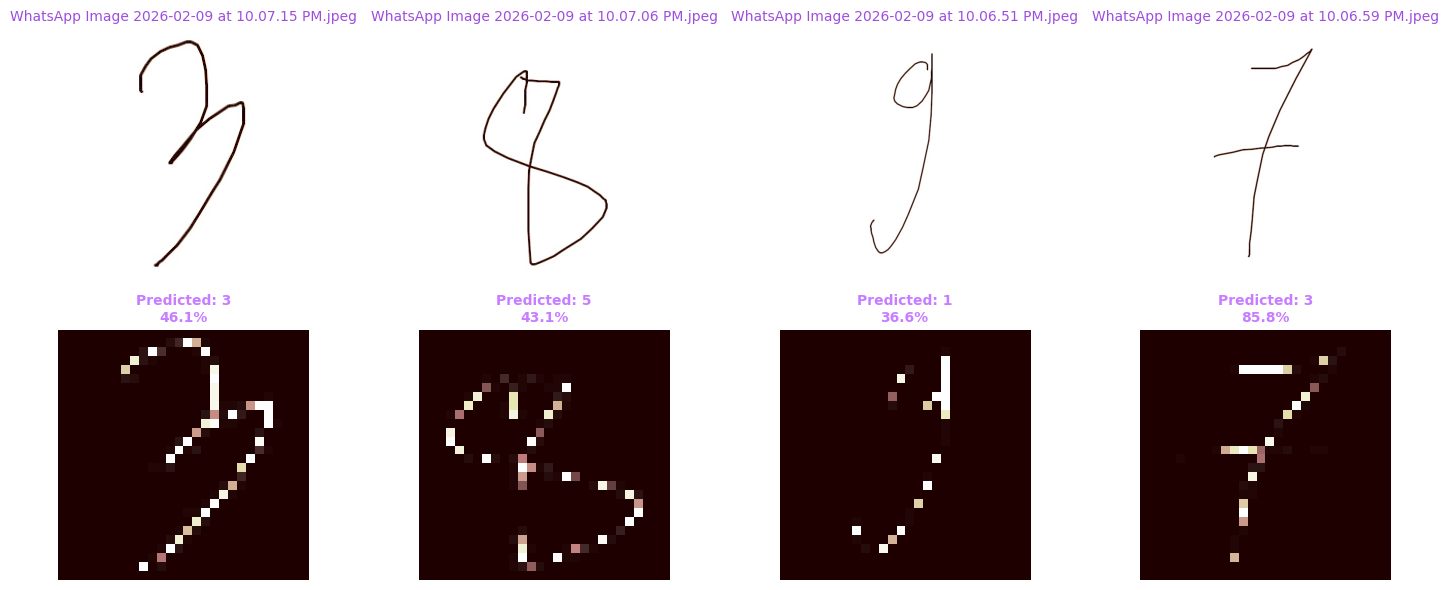


Prediction Results:
                                     filename  predicted_digit  confidence
WhatsApp Image 2026-02-09 at 10.07.15 PM.jpeg                3   46.080910
WhatsApp Image 2026-02-09 at 10.07.06 PM.jpeg                5   43.105690
WhatsApp Image 2026-02-09 at 10.06.51 PM.jpeg                1   36.635956
WhatsApp Image 2026-02-09 at 10.06.59 PM.jpeg                3   85.807808


In [80]:
photo_results = predict_from_folder('/kaggle/input/photos', model)


In [81]:
# Generate submission for test data using the augmented model
results = model.predict(test_reshaped)
results = np.argmax(results, axis=1)

submission = pd.DataFrame({
    "ImageId": list(range(1, len(results) + 1)),
    "Label": results
})

submission.to_csv("submission_augmented.csv", index=False)
print("Submission file created successfully")

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Submission file created successfully
